In [1]:
from collections import Counter, namedtuple
from tqdm import tqdm_notebook as tqdm
from util import (
    calculate_score,
    feature_to_target,
    load_data,
    target_to_feature,
)

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

TRAIN_FILE = './data/train.csv'
TEST_FILE = './data/test.csv'
RANDOM_STATE = 42

In [2]:
train_df, test_df = load_data(TRAIN_FILE, TEST_FILE, None, None)
train_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [3]:
def get_sat_data(df, sat_id):
    return df[df.sat_id == sat_id]

def calc_distances(sat_df, origin_id):
    points = sat_df[['x_sim', 'y_sim', 'z_sim']].values # n x 3
    origin_coords = points[origin_id] # 3
    distances = points - origin_coords
    return np.sqrt(np.sum(distances * distances, axis=1)) # n

def make_df_with_distances(sat_df, origin_id):
    new_df = sat_df.copy()
    new_df['distance'] = calc_distances(sat_df, origin_id)
    new_df.sort_values(by=['distance', 'epoch'], inplace=True)
    return new_df

<ipython-input-209-bbd07bdbb5e1>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figur = plt.figure()


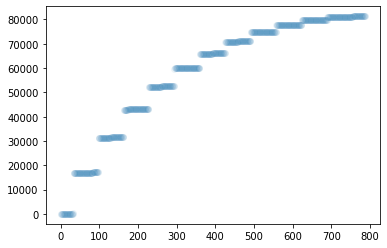

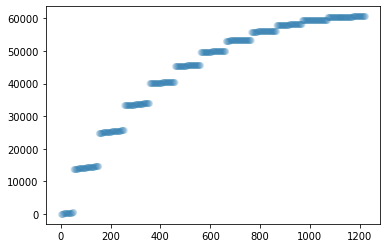

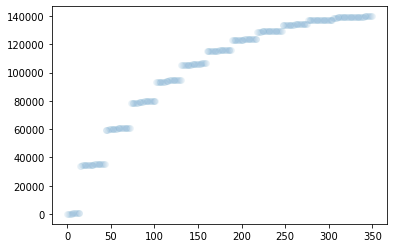

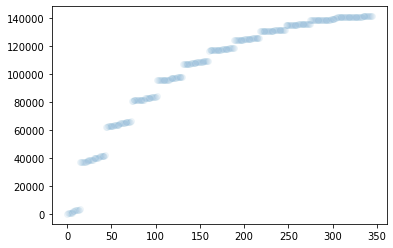

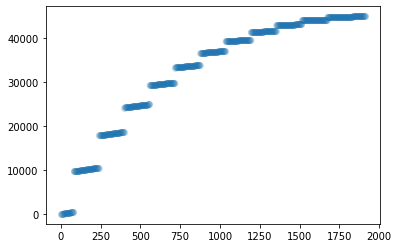

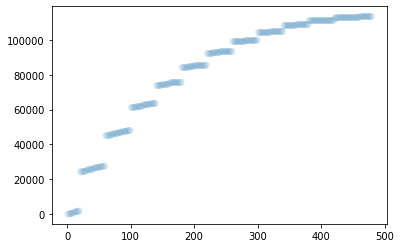

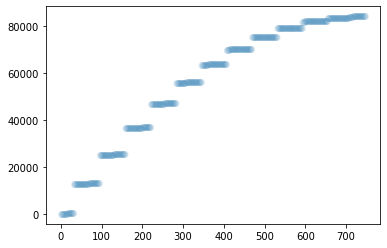

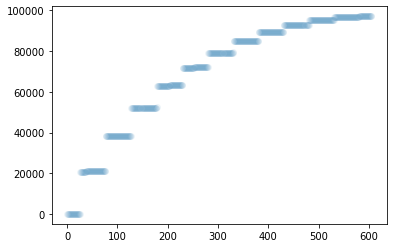

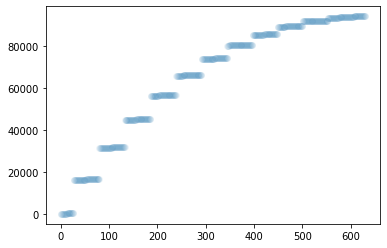

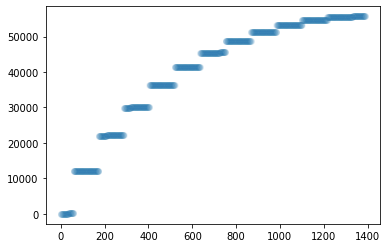

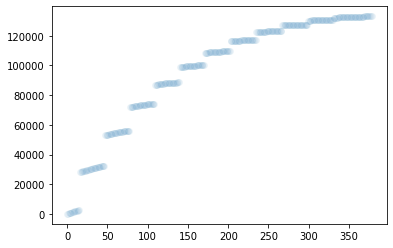

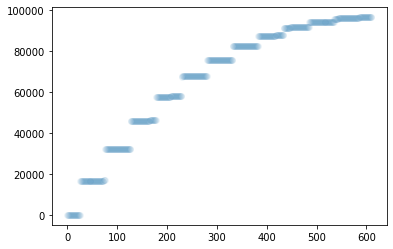

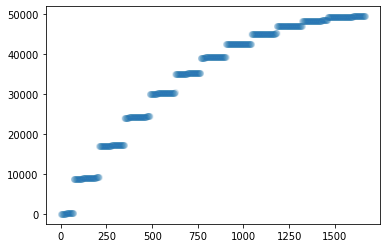

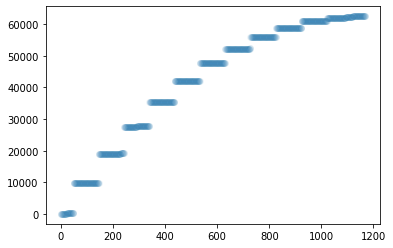

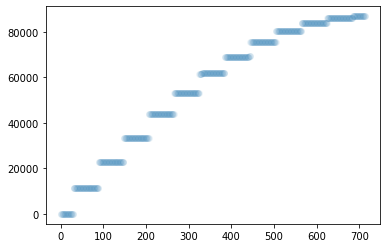

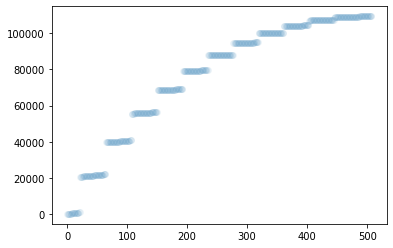

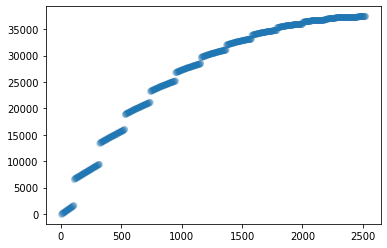

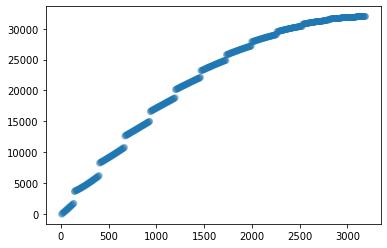

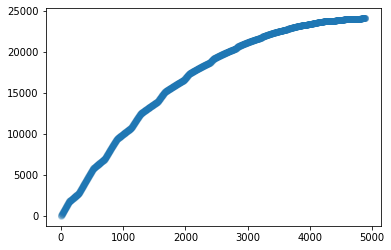

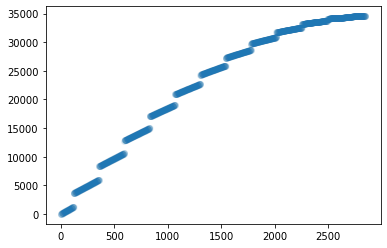

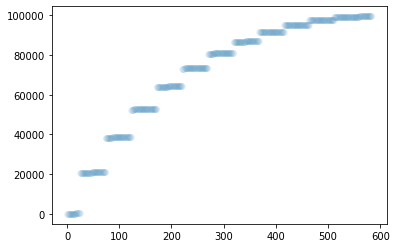

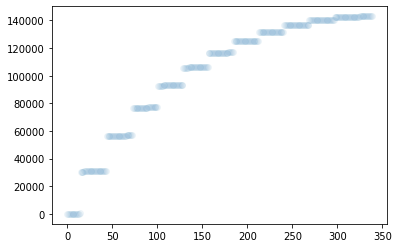

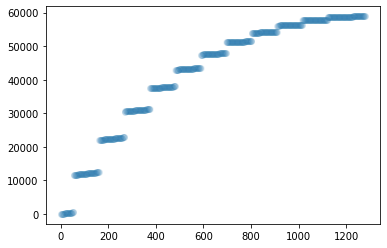

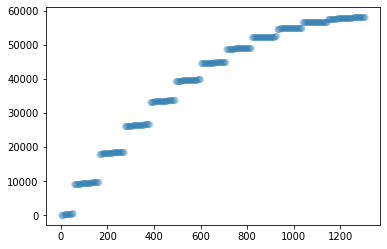

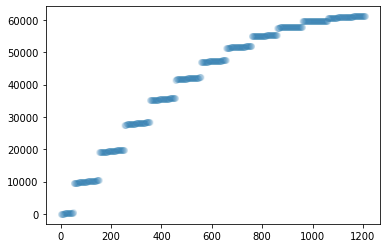

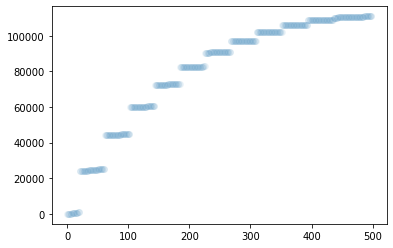

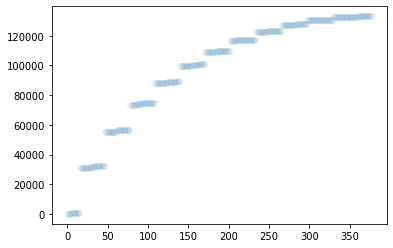

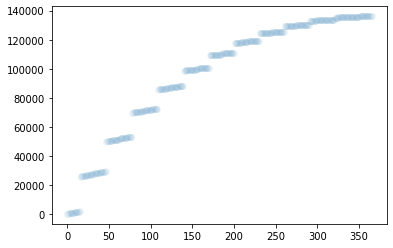

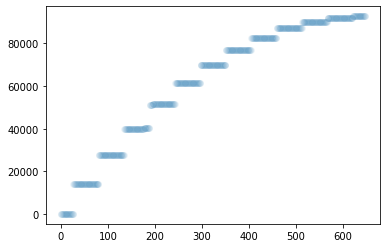

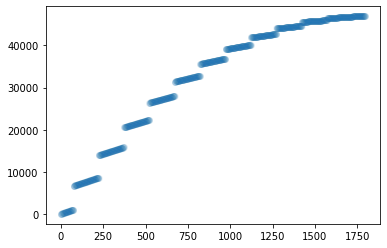

In [209]:
for SAT_ID in range(570,600):
#     SAT_ID = 30
    ORIGIN_ID = 0

    sat_df = get_sat_data(train_df, SAT_ID)
    dist_df = make_df_with_distances(sat_df, ORIGIN_ID)
    figur = plt.figure()
    plt.scatter(np.arange(dist_df.distance.values.size), dist_df.distance.values, alpha=0.05)

In [215]:
# 5, 36, 136, 166, 184, 186, 209, 212, 272, 295, 299, 307, 311, 312, 321, 323, 355, 372, 412, 429,
# 458, 470 476, 491, 526, 529, 535, 588 -- 28 штук -- плохие чуваки

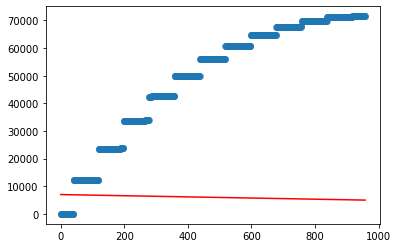

In [4]:
SAT_ID = 0
ORIGIN_ID = 0

sat_df = get_sat_data(train_df, SAT_ID)
dist_df = make_df_with_distances(sat_df, ORIGIN_ID)
plt.scatter(np.arange(dist_df.distance.values.size), dist_df.distance.values, alpha=0.5)
plt.plot([0, dist_df.shape[0]], [7000, 5000], c='r');

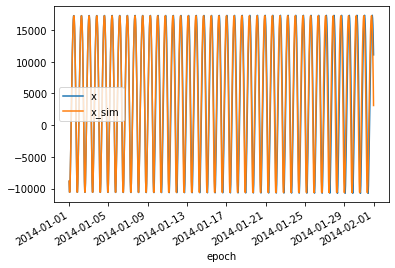

In [345]:
sat_df.plot('epoch', ['x', 'x_sim'])

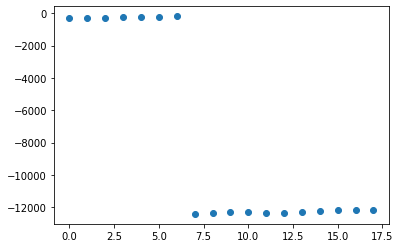

In [321]:
VAR = 'x'

cluster_df = dist_df[dist_df.distance < 5000]
cluster_df = cluster_df.sort_values('epoch')
cluster_var_errors = cluster_df[VAR].values - cluster_df[VAR + '_sim'].values
plt.scatter(np.arange(cluster_var_errors.size), cluster_var_errors);

In [338]:
#cluster_df[9:].plot('epoch', [f'{VAR}', f'{VAR}_sim'])
#cluster_df.plot('epoch', f'{VAR}')
#cluster_df.plot('epoch', f'{VAR}_sim')

#cluster_df[8:].plot('epoch', f'{VAR}')
#cluster_df[8:].plot('epoch', f'{VAR}_sim')

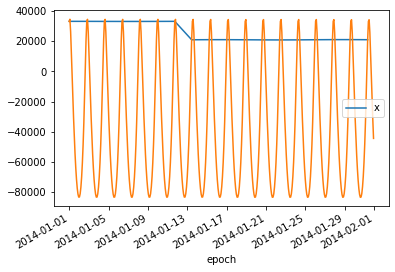

In [342]:
ax = cluster_df.plot('epoch', f'{VAR}')
ax.plot(sat_df.epoch, sat_df[VAR])

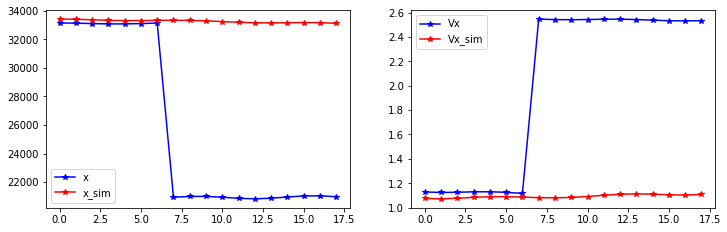

In [323]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(cluster_df[VAR].values, c='b', label=f'{VAR}', marker='*')
plt.plot(cluster_df[VAR + '_sim'].values, c='r', label=f'{VAR}_sim', marker='*')
plt.legend()

plt.subplot(222)
plt.plot(cluster_df['V' + VAR].values, c='b', label=f'V{VAR}', marker='*')
plt.plot(cluster_df['V' + VAR + '_sim'].values, c='r', label=f'V{VAR}_sim', marker='*')
plt.legend()

In [266]:
list(zip(cluster_df.epoch.values, cluster_var_errors))

[(numpy.datetime64('2014-01-01T00:00:00.000000000'), -273.0254788810489),
 (numpy.datetime64('2014-01-02T18:55:50.462000000'), -271.3421617333224),
 (numpy.datetime64('2014-01-04T13:51:40.924000000'), -265.3019354019998),
 (numpy.datetime64('2014-01-06T08:47:31.387000000'), -249.4039067067788),
 (numpy.datetime64('2014-01-08T03:43:21.849000000'), -230.4165926654532),
 (numpy.datetime64('2014-01-09T22:39:12.311000000'), -210.76543388026766),
 (numpy.datetime64('2014-01-11T17:35:02.773000000'), -187.38851671179873),
 (numpy.datetime64('2014-01-13T10:43:33.634000000'), -12407.874072706094),
 (numpy.datetime64('2014-01-15T05:39:24.096000000'), -12334.949593924724),
 (numpy.datetime64('2014-01-17T00:35:14.558000000'), -12300.177164384579),
 (numpy.datetime64('2014-01-18T19:31:05.020000000'), -12309.54300707698),
 (numpy.datetime64('2014-01-20T14:26:55.482000000'), -12337.024893248625),
 (numpy.datetime64('2014-01-22T09:22:45.944000000'), -12337.352454627919),
 (numpy.datetime64('2014-01-24T

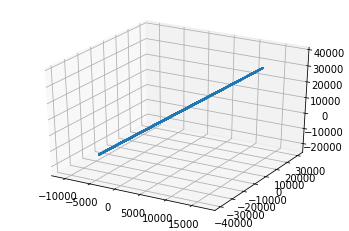

In [240]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAT_ID = 0

sat_df = get_sat_data(train_df, SAT_ID)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sat_df.x.values, sat_df.y.values, sat_df.z.values)

In [241]:
sat_df.epoch.values

array(['2014-01-01T00:00:00.000000000', '2014-01-01T00:46:43.000000000',
       '2014-01-01T01:33:26.001000000', '2014-01-01T02:20:09.001000000',
       '2014-01-01T03:06:52.002000000', '2014-01-01T03:53:35.002000000',
       '2014-01-01T04:40:18.003000000', '2014-01-01T05:27:01.003000000',
       '2014-01-01T06:13:44.004000000', '2014-01-01T07:00:27.004000000',
       '2014-01-01T07:47:10.005000000', '2014-01-01T08:33:53.005000000',
       '2014-01-01T09:20:36.006000000', '2014-01-01T10:07:19.006000000',
       '2014-01-01T10:54:02.007000000', '2014-01-01T11:40:45.007000000',
       '2014-01-01T12:27:28.008000000', '2014-01-01T13:14:11.008000000',
       '2014-01-01T14:00:54.009000000', '2014-01-01T14:47:37.009000000',
       '2014-01-01T15:34:20.010000000', '2014-01-01T16:21:03.010000000',
       '2014-01-01T17:07:46.011000000', '2014-01-01T17:54:29.011000000',
       '2014-01-01T18:41:12.012000000', '2014-01-01T19:27:55.012000000',
       '2014-01-01T20:14:38.013000000', '2014-01-01

In [48]:
def calc_distance_errors(sat_df):
    val = sat_df[['x', 'y', 'z']].values
    sim = sat_df[['x_sim', 'y_sim', 'z_sim']].values
    distances = val - sim
    return np.sqrt(np.sum(distances * distances, axis=1))

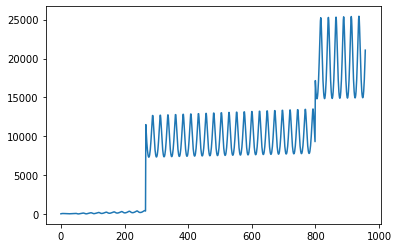

In [49]:
dist_errors = calc_distance_errors(sat_df)
plt.plot(dist_errors)

In [67]:
sat_df[263:].head(15)

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
263,263,2014-01-09 12:46:29.131,0,-5456.186371,22601.655498,-13148.643926,-1.379509,-2.658698,-3.118518,-5586.442190,22343.942665,-13471.890900,-1.365343,-2.703547,-3.091088
264,264,2014-01-09 13:33:12.131,0,-8754.781633,13465.490598,-20536.849411,-0.934997,-3.780260,-2.064803,-8834.787324,13104.218398,-20756.463430,-0.914046,-3.806834,-2.019962
265,265,2014-01-09 14:19:55.132,0,-10546.176585,2012.609725,-24388.824075,-0.331417,-4.268713,-0.659492,-10565.188051,1612.526159,-24474.406246,-0.310006,-4.269733,-0.611353
266,266,2014-01-09 15:06:38.132,0,-10633.298227,-9806.393558,-24297.776171,0.252715,-4.063410,0.683779,-10598.568246,-10179.796712,-24259.737308,0.269069,-4.045004,0.722504
267,267,2014-01-09 15:06:38.133,0,-10633.297974,-9806.397621,-24297.775488,0.252715,-4.063410,0.683780,-9191.593400,-20646.321520,-20746.321250,0.707418,-3.373144,1.719780
268,268,2014-01-09 15:53:21.133,0,-9262.964078,-20338.958697,-20874.335385,0.697580,-3.400382,1.694238,-6783.933571,-28925.531910,-14972.421097,0.985474,-2.521343,2.341826
269,269,2014-01-09 16:40:04.134,0,-6874.923028,-28697.704574,-15155.594599,0.981042,-2.550124,2.327476,-3790.755830,-34770.786699,-7904.441876,1.131264,-1.655330,2.657569
270,270,2014-01-09 17:26:47.134,0,-3888.482203,-34621.521884,-8115.939038,1.130613,-1.682366,2.651212,-532.477508,-38264.302757,-281.513194,1.180130,-0.850693,2.750633
271,271,2014-01-09 18:13:30.135,0,-628.221367,-38186.984605,-502.706102,1.181959,-0.874984,2.749713,2761.042456,-39622.051999,7370.000400,1.160408,-0.133277,2.687204
272,272,2014-01-09 19:00:13.135,0,2672.965980,-39608.791306,7151.842313,1.163847,-0.154781,2.690048,5927.048541,-39096.889049,14679.858326,1.091821,0.493143,2.512996
